---
# TITLE: A DATA DETERMINATION FOR CAR HIRING AND RENTAL BUSINESS 
---

### PROJECT DESCRIPTION:
This project is to analyse on the different vehicle in terms of Make and Model, Engine size and Cylinder, Vehicle Class and Transmission, Fuel, Fuel comsumption and  Emmision amongest others, so as to make the right decision of the right kind of vehicle to deal with  in the competitive market. This market may also vary dippending on the occasion, intended purposes and the economic status present.  

### PROBLEM STATEMENT
Due to the competitive environment of car hiring and rental business, it is much difficult to know the most effective and reliable vehicle in trend than can be selected so as to suit the competitive evironment. We therefore deep into the data available, analyses the trend of the vihecle in thier different ways of categories, so as to give the best advice on the possible vehicle depending on the occasion, intended purpose and more economical, that can suite the business competition,  and even able to beat the competitive environment.


### OBJECTIVES

- To be able to load the Data, Display/Examine it in different ways (number of columns and rows, descriptions, info, etc), and to do the cleaning of the Data, for smooth analyzatio process.
- Exermine the different relations the data in terms of the Class vs Fuel Comsumption, Class vs Engine and Cylinder distributions etc, so as to check on there respective trends.
- Perform the statistical technique that predicts the different effects of the vehicle based on transition, the fuel consumption and emission.
- Give the best advice based on the analysis, on the appropriate vehicle suitable for the intended business.

# DATA
---

## 1.0 Data Display And Data Cleaning

### 1.0.1 Libraries importation and data viewing in different ways

In [265]:
# importations on the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats


In [68]:
# The Reading And Display of the Data
Data = pd.read_csv("Fuel_Consumption_2000_2022.csv")
Data.head(10)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
5,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,9.3,6.8,8.2,34,189
6,2000,ACURA,INTEGRA GSR/TYPE R,SUBCOMPACT,1.8,4,M5,Z,9.4,7.0,8.3,34,191
7,2000,ACURA,NSX,SUBCOMPACT,3.0,6,AS4,Z,13.6,9.2,11.6,24,267
8,2000,ACURA,NSX,SUBCOMPACT,3.2,6,M6,Z,13.8,9.1,11.7,24,269
9,2000,AUDI,A4,COMPACT,1.8,4,A5,Z,11.4,7.2,9.5,30,218


In [69]:
#obtaining breif infomation about this data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [70]:
#checking on the columns of the dataset
Data.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [71]:
#checking on the dataset shape
Data.shape

(22556, 13)

In [72]:
#checking the datatype of each columns
Data.dtypes

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

In [195]:
# checking the data description
Data.describe(include='O')

,MAKE,MODEL,VEHICLE CLASS,TRANSMISSION,FUEL
count,22556,22556,22556,22556,22556
unique,87,4242,32,30,5
top,CHEVROLET,JETTA,SUV,A4,X
freq,1725,89,2640,3519,11822


### 1.0.2 Data Cleaning

In [74]:
#obtainiong the dataset copy
Data1=Data.copy()
Data1.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [75]:
#checking null values
Data1.isna().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [76]:
#Checking duplicated value
Data1.duplicated().sum()

1

In [77]:
#droping the duplicate
Data11=Data1.drop_duplicates()

In [78]:
#checking the existence of the duplicate
Data11.duplicated().sum()

0

In [79]:
#Renaming 
Df=Data11
Df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


## 2.0 Data Exermination In Different Relations

In [80]:
#counting number of vehicles existing in there respective vehicle make
Vehicle_Make_Count=Df["MAKE"].value_counts()
Vehicle_Make_Count

MAKE
CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
                 ... 
ALFA ROMEO          8
SRT                 4
GENESIS             4
BUGATTI             3
PLYMOUTH            2
Name: count, Length: 87, dtype: int64

In [81]:
#counting number of vehicles existing in there respective vehicle Model
Vehicle_Model_Count=Df["MODEL"].value_counts()
Vehicle_Model_Count

MODEL
JETTA          89
MUSTANG        88
RANGER         61
SENTRA         58
ALTIMA         57
               ..
Optima FE       1
ARNAGE RL       1
BROOKLANDS      1
335d SEDAN      1
XC60 B6 AWD     1
Name: count, Length: 4242, dtype: int64

In [82]:
#counting number of vehicles existing in there respective vehicle class
Vehicle_Class_Count=Df["VEHICLE CLASS"].value_counts()
Vehicle_Class_Count

VEHICLE CLASS
SUV                         2639
COMPACT                     2636
MID-SIZE                    2300
PICKUP TRUCK - STANDARD     1689
SUBCOMPACT                  1559
FULL-SIZE                   1086
TWO-SEATER                   999
SUV: Small                   929
SUV - SMALL                  827
MINICOMPACT                  783
STATION WAGON - SMALL        737
Mid-size                     660
SUV: Standard                608
Pickup truck: Standard       515
SUV - STANDARD               514
Compact                      491
Subcompact                   451
Full-size                    417
PICKUP TRUCK - SMALL         403
MINIVAN                      366
STATION WAGON - MID-SIZE     343
VAN - CARGO                  332
Two-seater                   313
VAN - PASSENGER              287
Minicompact                  211
Station wagon: Small         140
Pickup truck: Small          108
Special purpose vehicle       62
SPECIAL PURPOSE VEHICLE       52
Station wagon: Mid-size      

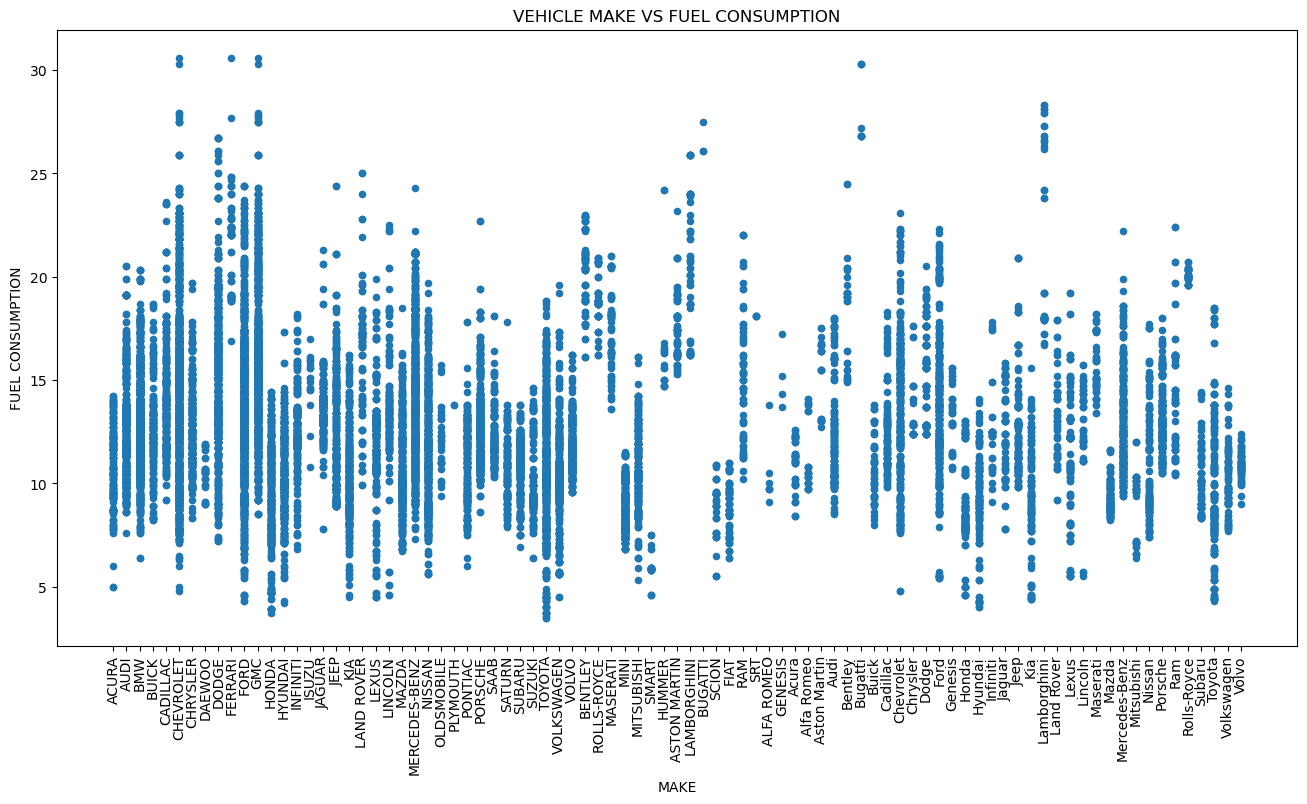

In [83]:
Df.plot.scatter(figsize=(16,8), y="FUEL CONSUMPTION", x="MAKE", title="VEHICLE MAKE VS FUEL CONSUMPTION", rot=90);

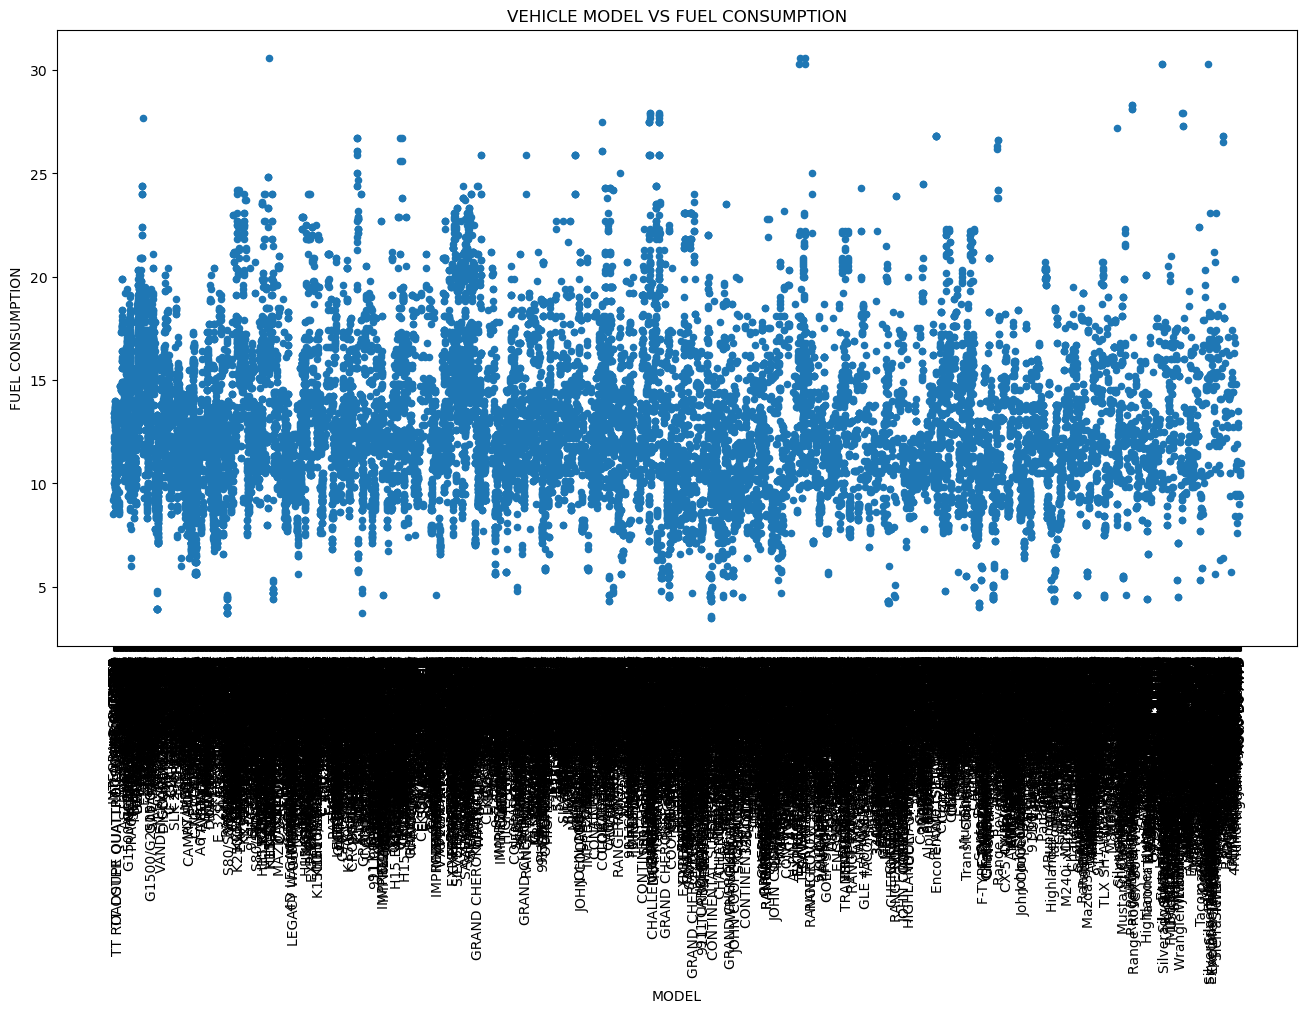

In [241]:
Df.plot.scatter(figsize=(16,8), y="FUEL CONSUMPTION", x="MODEL", title="VEHICLE MODEL VS FUEL CONSUMPTION", rot=90);

''

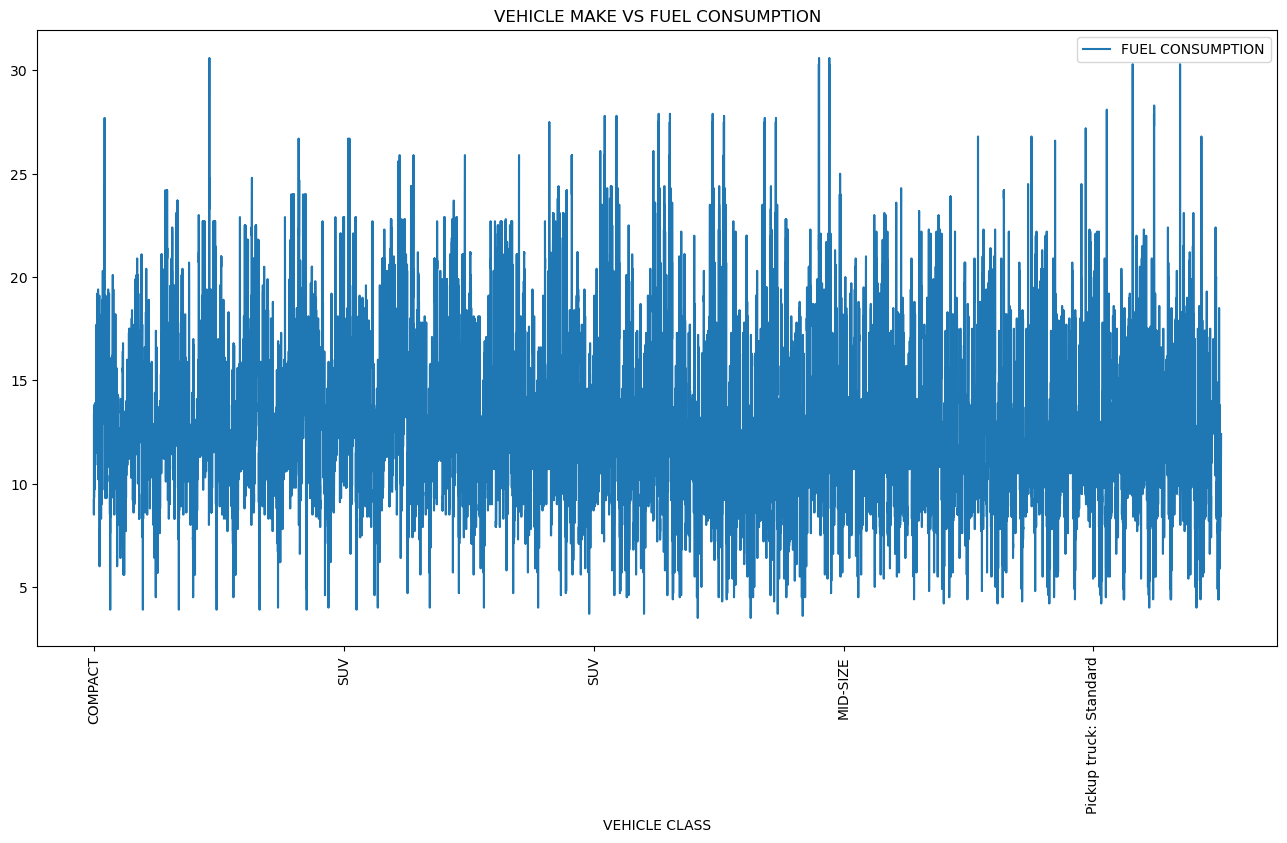

In [203]:
Df.plot.line(figsize=(16,8), y="FUEL CONSUMPTION", x="VEHICLE CLASS", title="VEHICLE MAKE VS FUEL CONSUMPTION", rot=90)

;

### Categorizing vehicles in rage of fuel consumption

In [192]:
# between 0-5
Vehicle_Consuming_0_to_5_Fuel=Df[(Df["FUEL CONSUMPTION"].between(0, 5))]

In [194]:
Vehicle_Consuming_0_to_5_Fuel["ENGINE SIZE"].var()

0.159789724164724

In [ ]:
ENGINE SIZE	CYLINDERS	TRANSMISSION	FUEL		HWY (L/100 km)	COMB (L/100 km)	COMB (mpg)	EMISSIONS

In [116]:
#between 5-10
Vehicle_Consuming_5_to_10_Fuel=Df[(Df["FUEL CONSUMPTION"].between(5, 10))]

In [117]:
#between 10-15
Vehicle_Consuming_10_to_15_Fuel=Df[(Df["FUEL CONSUMPTION"].between(10, 15))]

In [118]:
#between 15-20
Vehicle_Consuming_15_to_20_Fuel=Df[(Df["FUEL CONSUMPTION"].between(15, 20))]

In [119]:
#between 20-25
Vehicle_Consuming_20_to_25_Fuel=Df[(Df["FUEL CONSUMPTION"].between(20, 25))]

In [120]:
#between 25-30
Vehicle_Consuming_25_to_30_Fuel=Df[(Df["FUEL CONSUMPTION"].between(25, 30))]

In [127]:
#more than 30
Vehicle_Consuming_more_than_30_Fuel=Df[(Df["FUEL CONSUMPTION"]>30)]

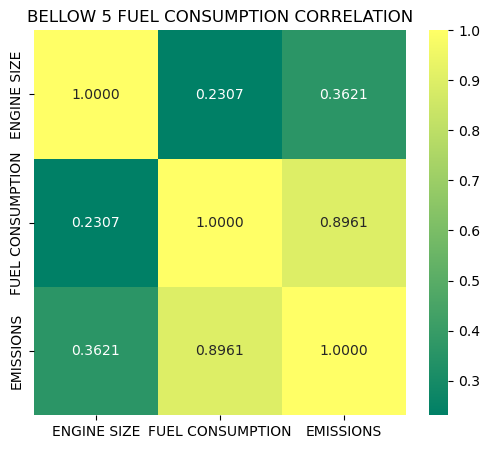

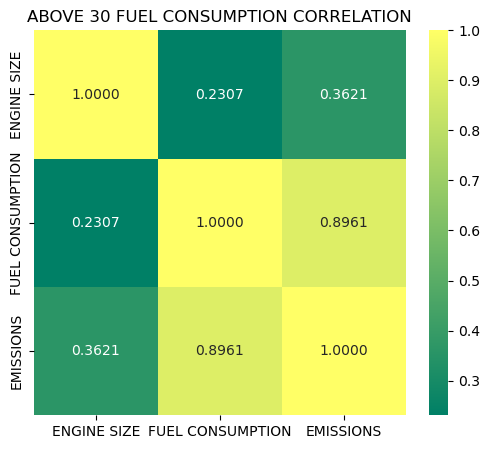

In [207]:
#getting the correlations
plt.figure(figsize=(6, 5))
Fuel_Consumption_of_up_to_5 = Vehicle_Consuming_0_to_5_Fuel[['ENGINE SIZE', 'FUEL CONSUMPTION', 'EMISSIONS']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='summer', fmt='.4f')
plt.title('BELLOW 5 FUEL CONSUMPTION CORRELATION');


plt.figure(figsize=(6, 5))
Fuel_Consumption_more_than_30=Vehicle_Consuming_more_than_30_Fuel[['ENGINE SIZE', 'FUEL CONSUMPTION', 'EMISSIONS']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='summer', fmt='.4f')
plt.title('ABOVE 30 FUEL CONSUMPTION CORRELATION');




In [158]:
#low fuel consumption vehicles with low emmision
Low_Emissin_vehicles_for_Fuel_Below_5=Vehicle_Consuming_0_to_5_Fuel[(Vehicle_Consuming_0_to_5_Fuel["EMISSIONS"]<150)]
Low_Emissin_vehicles_for_Fuel_Below_5

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
328,2000,HONDA,INSIGHT,SUBCOMPACT,1.0,3,M5,X,3.9,3.2,3.6,78,83
982,2001,HONDA,INSIGHT,TWO-SEATER,1.0,3,M5,X,3.9,3.2,3.6,78,83
1240,2001,TOYOTA,PRIUS,COMPACT,1.5,4,AV,X,4.5,4.7,4.6,61,106
1702,2002,HONDA,INSIGHT,TWO-SEATER,1.0,3,M5,X,3.9,3.2,3.6,78,83
1988,2002,TOYOTA,PRIUS,COMPACT,1.5,4,AV,X,4.5,4.7,4.6,61,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22144,2022,Kia,Niro Touring,Station wagon: Small,1.6,4,AM6,X,5.0,5.6,5.3,53,124
22485,2022,Toyota,Camry Hybrid LE,Mid-size,2.5,4,AV,X,4.9,4.8,4.9,58,113
22496,2022,Toyota,Corolla Hybrid,Compact,1.8,4,AV,X,4.4,4.5,4.5,63,106
22506,2022,Toyota,Prius,Mid-size,1.8,4,AV,X,4.4,4.7,4.5,63,106


In [179]:
 #low emmision vehicles with big engine and consume less fuel
Low_Emissin_vehicles_for_Fuel_Below_5_with_engine_greater_than_2=Low_Emissin_vehicles_for_Fuel_Below_5[(Low_Emissin_vehicles_for_Fuel_Below_5["ENGINE SIZE"]>2)]
Low_Emissin_vehicles_for_Fuel_Below_5_with_engine_greater_than_2.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
9346,2010,FORD,FUSION HYBRID,MID-SIZE,2.5,4,AV,X,4.6,5.4,5.0,56,115
10416,2011,FORD,FUSION HYBRID,MID-SIZE,2.5,4,AV,X,4.6,5.4,5.0,56,115
10699,2011,LINCOLN,MKZ HYBRID,MID-SIZE,2.5,4,AV,X,4.6,5.4,5.0,56,115
11476,2012,FORD,FUSION HYBRID,MID-SIZE,2.5,4,AV,X,4.6,5.4,5.0,56,115
11752,2012,LINCOLN,MKZ HYBRID,MID-SIZE,2.5,4,AV,X,4.6,5.4,5.0,56,115


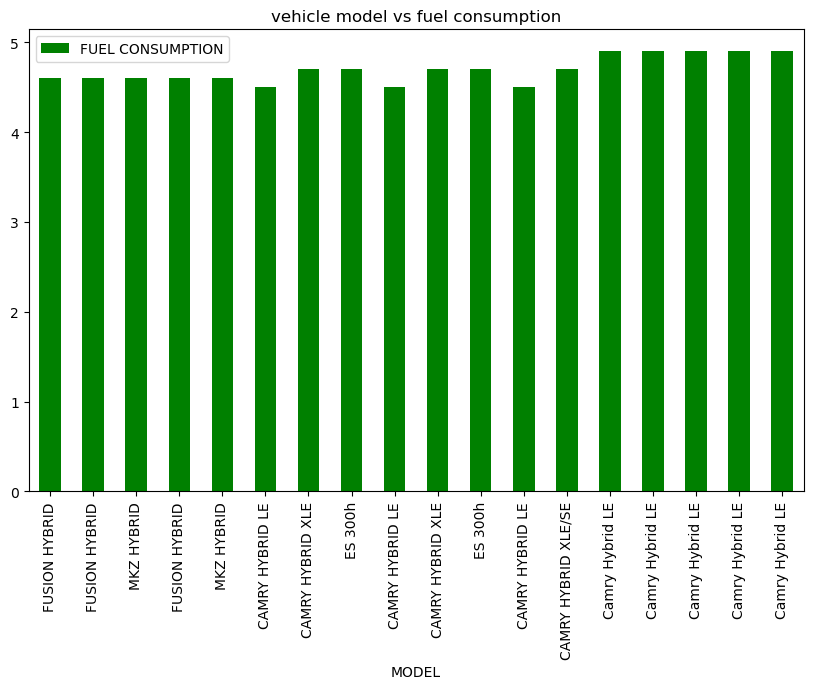

In [260]:
#vehhicles with lesser fuel cosumption and emission but with greater engine size graph
Low_Emissin_vehicles_for_Fuel_Below_5_with_engine_greater_than_2.plot(kind='bar',
                                                                     x= "MODEL",
                                                                      y="FUEL CONSUMPTION",
                                                                      title="vehicle model vs fuel consumption", color="green", figsize=(10, 6,));

## 3.0 cheching data in its univariet way

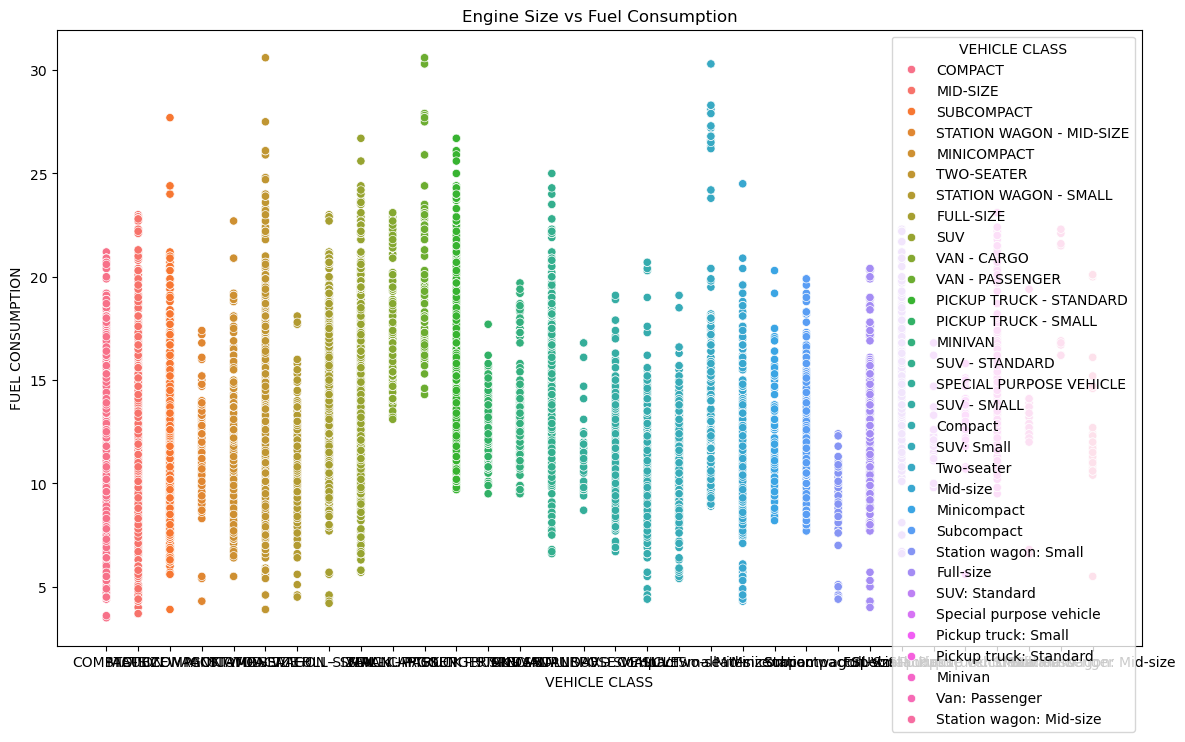

In [258]:
# Scatter Plot: Engine Size vs Fuel Consumption
plt.figure(figsize=(14, 8))
sns.scatterplot(data=Df, x='VEHICLE CLASS', 
                y='FUEL CONSUMPTION', 
                hue='VEHICLE CLASS')
plt.title("Engine Size vs Fuel Consumption")
plt.show()



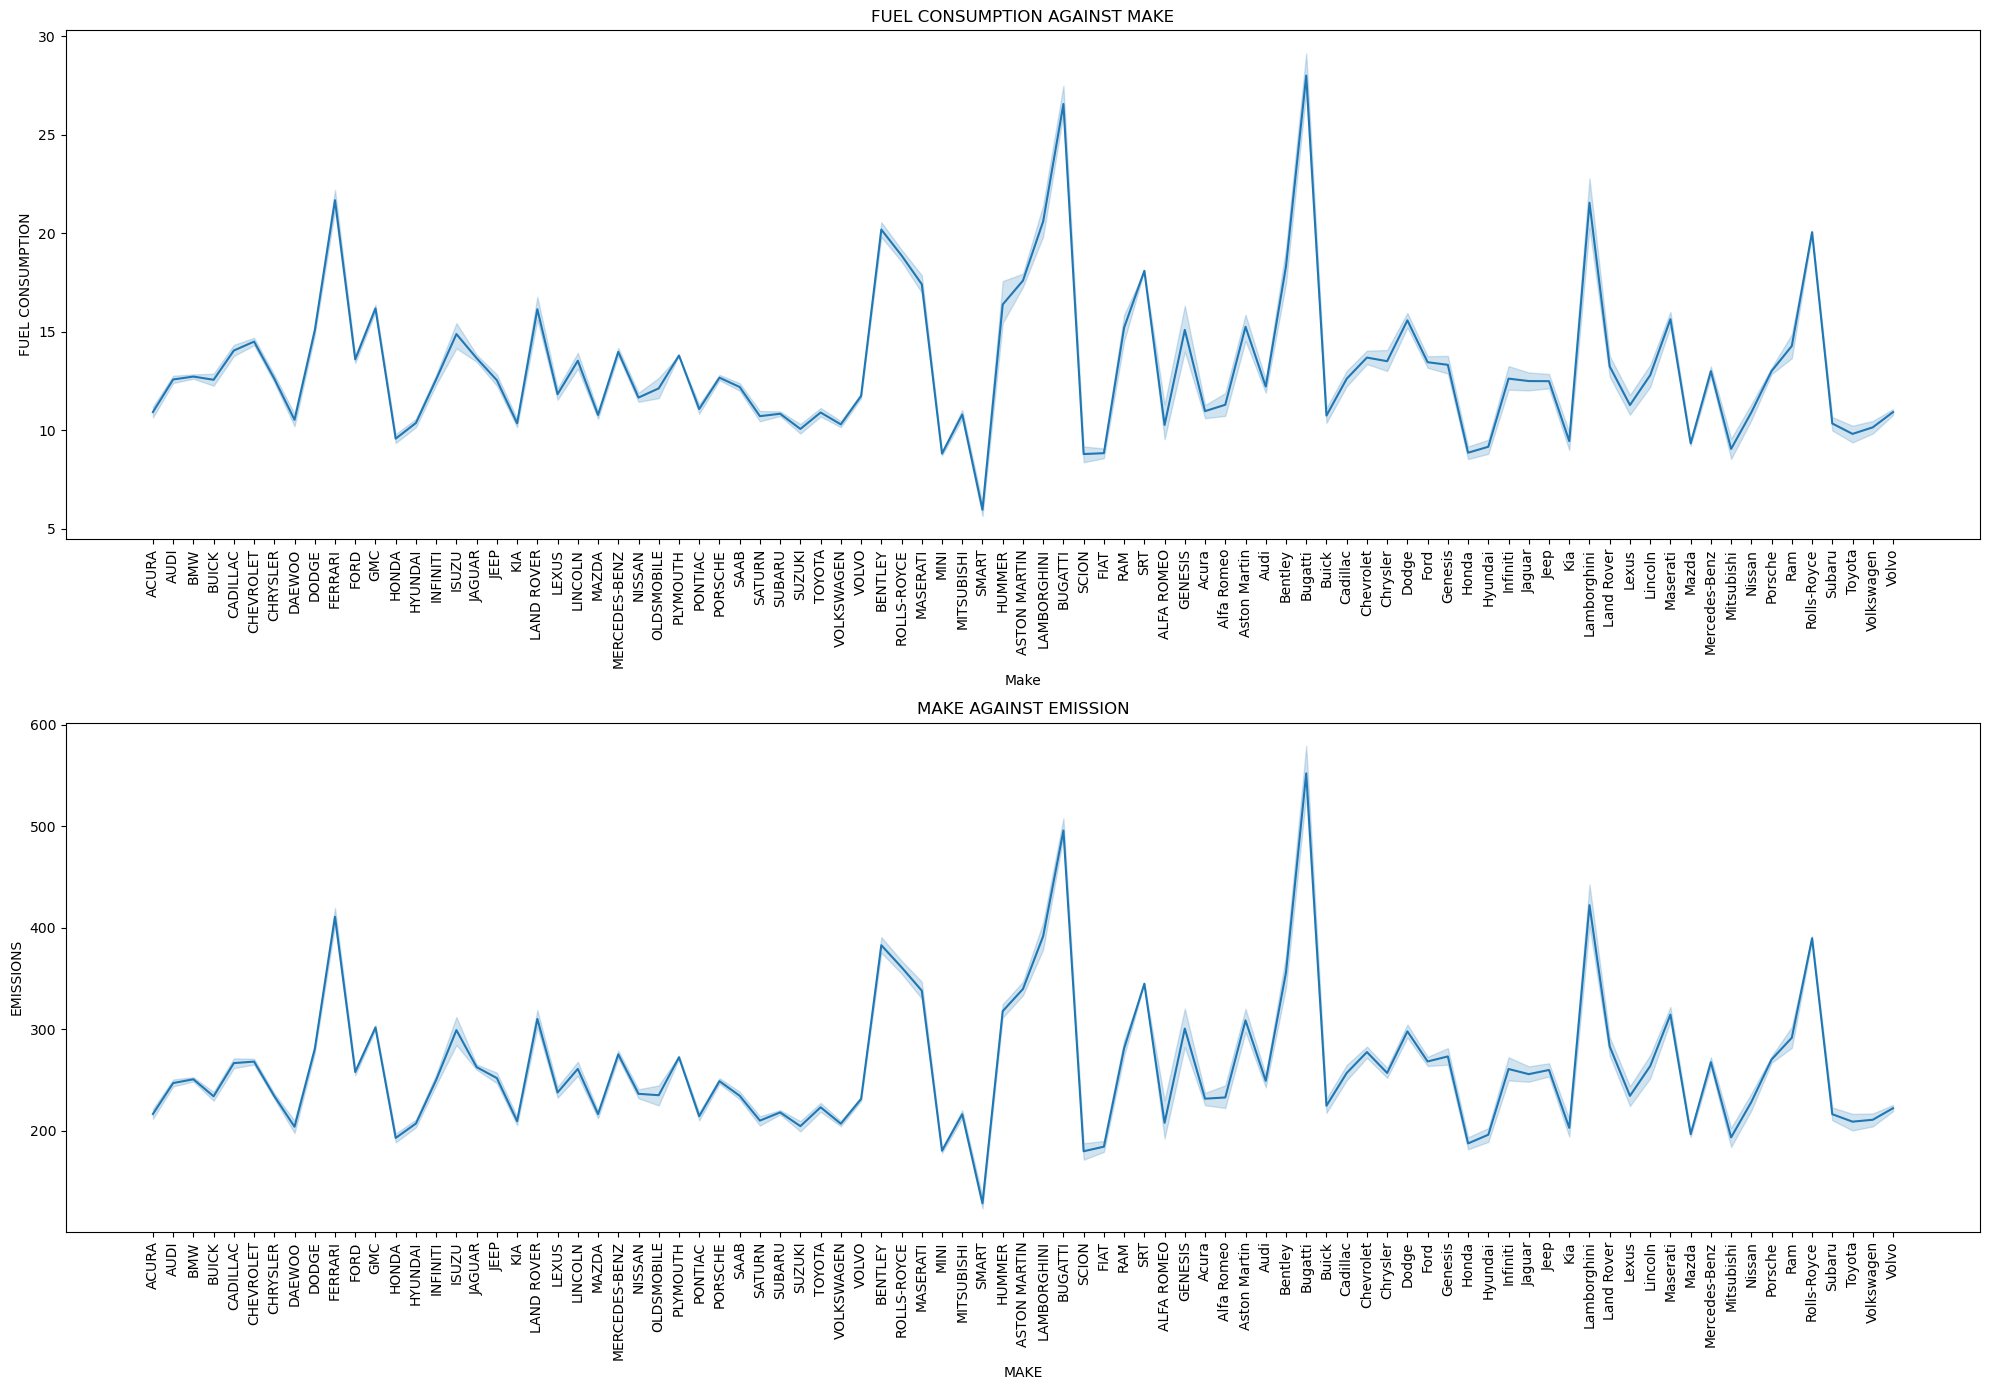

In [259]:
# checking on the trends of the makes against fuel consumptions and emissions


fig, axes = plt.subplots(2, 1, figsize=(20, 14)) 
sns.lineplot(x='MAKE', y='FUEL CONSUMPTION', data=Df, ax=axes[0]) 
axes[0].set_title('FUEL CONSUMPTION AGAINST MAKE') 
axes[0].set_ylabel('FUEL CONSUMPTION') 
axes[0].set_xlabel('Make')
axes[0].tick_params(axis='x',rotation=90)
sns.lineplot(x='MAKE', y='EMISSIONS', data=Df, ax=axes[1]) 
axes[1].set_title('MAKE AGAINST EMISSION') 
axes[1].set_ylabel('EMISSIONS') 
axes[1].set_xlabel('MAKE')
axes[1].tick_params(axis='x',rotation=90)
plt.tight_layout(); 


## Cheking on the effects of the Engine size on the Emission_wise

Regretion model usage

In [269]:
#application of the regretion
x= Df['ENGINE SIZE']
y=Df['EMISSIONS']
x = sm.add_constant(x)#constant setting
model = sm.OLS(y,x).fit()#fitting the regressio
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              EMISSIONS   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                 4.674e+04
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        05:30:05   Log-Likelihood:            -1.1145e+05
No. Observations:               22555   AIC:                         2.229e+05
Df Residuals:                   22553   BIC:                         2.229e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         127.5401      0.610    209.114      0.000     126.345     128.736
ENGINE SIZE    36.5021      0.169    216.204      0.000      36.171      36.833
==============================================================================
Omnibus:                      973.339   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2754.986
Skew:                           0.182   Prob(JB):                         0.00
Kurtosis:                       4.673   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Interpretation

An 0.675 r-squre translates to 67.5% of the variance in emission which is directly affected by the engine size, and thus a linear relationship existens.
    
This also predicts that the bigger the size of the engine the higher the amount of emmision

F-statistic is 4.675e+04 and p-value of 0.000, hence translate the model is statistically significant 

### Coefficients
A constant of 127.5401 is too high thus predicts the amout of emissions from the enging size

Engine Size Coefficient is 36.5021 meaning for every 36 unit modification in engine size also modify am emission of the same

### Hypothesis Test Conclusion
We fail to reject the hypothesis due the p-value of the engine size coefficient which is much more highl

### Hypothesis setting

Null Hypothesis: there is no emission difference in the models of the vehicles.

Alternative Hypothesis: there is indeed a adifference of the emissions in the different models of the vehicle.

In [272]:
# Group emissions by fuel type
fuel_groups = Df.groupby('MODEL')['EMISSIONS'].apply(list)

# Performing ANOVA
f_statistic, p_value = stats.f_oneway(*fuel_groups)

# Printing results
print(f"F-statistic: {f_statistic}")
print(f"\nP-value: {p_value}")

F-statistic: 58.28718318928561

P-value: 0.0


### Key Model Statistics Interpretation
A 
F-statistiof 58.28 is quit higher thus suggest the greater variation of the emissions between the models.is.

The p-value0.05-zero is less than the  thus a reason of why we reject the null hypothesiss
### Hypothesis Test Conclusion
we reject the null hypothesis becouse the p-value is more less of 0.5iissions.

## RECOMMENDATIONS

- A size of the engine directly affect the fuel consumptions. due to the fact that the fuel consumption is the key, the company should therefore consider vehicles with  lesser engines.
- A size of the engine directly also affect the amount of emission produced. we therefore give recommendation of the vehicle of less emission, which in term are of less fuel consumption, and are of smaller engines of unpto 2.5
- as from the data, it is well potrayed that the vehicles of the SMART brand/Make, are the vehicle of more lesser fuel consumption, and emissions into the environment also is much lesser, thus a recommended vehicles.
